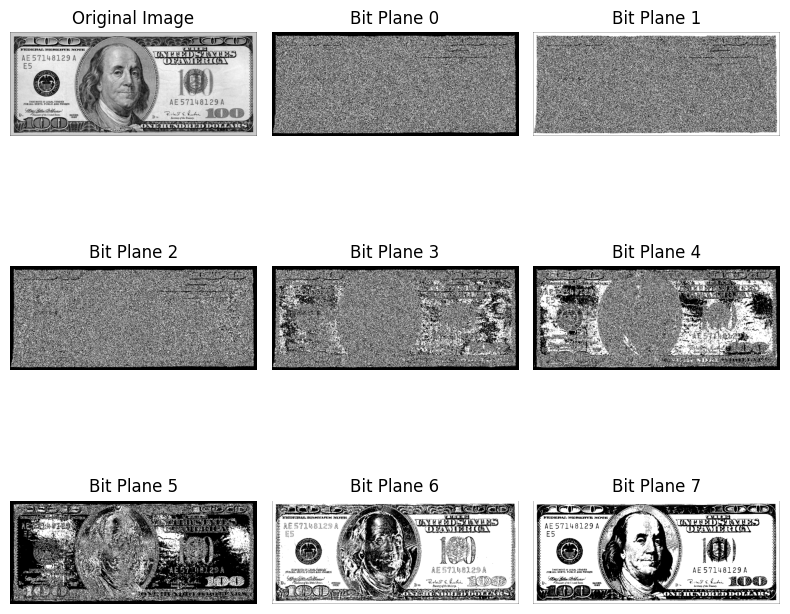

In [ ]:
# Q-1 Bit-plane slicing

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)

# Perform BIT plane slicing
bit_planes = []
for i in range(8):
    bit_plane = np.bitwise_and(img, 2**i)
    bit_planes.append(bit_plane)

# Display results
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
axs = axs.ravel()
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

for i, plane in enumerate(bit_planes):
    axs[i+1].imshow(plane, cmap='gray')
    axs[i+1].set_title(f'Bit Plane {i}')

for ax in axs:
    ax.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()

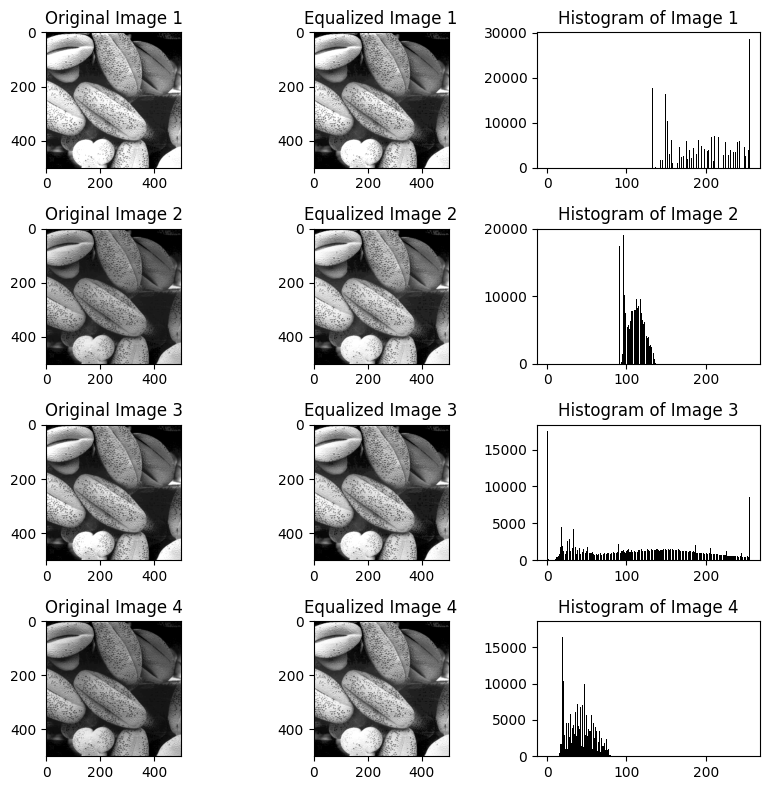

In [ ]:
# Q-2 Histogram Equalization

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread('/content/Fig0316(1)(top_left).tif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/Fig0316(2)(2nd_from_top).tif', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('/content/Fig0316(3)(third_from_top).tif', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('/content/Fig0316(4)(bottom_left).tif', cv2.IMREAD_GRAYSCALE)

# Compute histograms
hist1, bins1 = np.histogram(img1.flatten(), 256, [0, 256])
hist2, bins2 = np.histogram(img2.flatten(), 256, [0, 256])
hist3, bins3 = np.histogram(img3.flatten(), 256, [0, 256])
hist4, bins4 = np.histogram(img4.flatten(), 256, [0, 256])

# Compute cumulative distribution functions (CDFs)
cdf1 = hist1.cumsum()
cdf2 = hist2.cumsum()
cdf3 = hist3.cumsum()
cdf4 = hist4.cumsum()
cdf_normalized1 = cdf1 * hist1.max() / cdf1.max()
cdf_normalized2 = cdf2 * hist2.max() / cdf2.max()
cdf_normalized3 = cdf3 * hist3.max() / cdf3.max()
cdf_normalized4 = cdf4 * hist4.max() / cdf4.max()

# Perform histogram equalization
equalized_img1 = np.interp(img1.flatten(), bins1[:-1], cdf_normalized1).reshape(img1.shape)
equalized_img2 = np.interp(img2.flatten(), bins2[:-1], cdf_normalized2).reshape(img2.shape)
equalized_img3 = np.interp(img3.flatten(), bins3[:-1], cdf_normalized3).reshape(img3.shape)
equalized_img4 = np.interp(img4.flatten(), bins4[:-1], cdf_normalized4).reshape(img4.shape)

# Display results
fig, axs = plt.subplots(4, 3, figsize=(8, 8))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Original Image 1')
axs[0, 1].imshow(equalized_img1, cmap='gray')
axs[0, 1].set_title('Equalized Image 1')
axs[0, 2].hist(img1.flatten(), 256, [0, 256], color='black')
axs[0, 2].set_title('Histogram of Image 1')
axs[1, 0].imshow(img2, cmap='gray')
axs[1, 0].set_title('Original Image 2')
axs[1, 2].hist(img2.flatten(), 256, [0, 256], color='black')
axs[1, 2].set_title('Histogram of Image 2')
axs[1, 1].imshow(equalized_img2, cmap='gray')
axs[1, 1].set_title('Equalized Image 2')
axs[2, 0].imshow(img3, cmap='gray')
axs[2, 0].set_title('Original Image 3')
axs[2, 1].imshow(equalized_img3, cmap='gray')
axs[2, 1].set_title('Equalized Image 3')
axs[2, 2].hist(img3.flatten(), 256, [0, 256], color='black')
axs[2, 2].set_title('Histogram of Image 3')
axs[3, 0].imshow(img4, cmap='gray')
axs[3, 0].set_title('Original Image 4')
axs[3, 2].hist(img4.flatten(), 256, [0, 256], color='black')
axs[3, 2].set_title('Histogram of Image 4')
axs[3, 1].imshow(equalized_img4, cmap='gray')
axs[3, 1].set_title('Equalized Image 4')

plt.tight_layout()
plt.show()


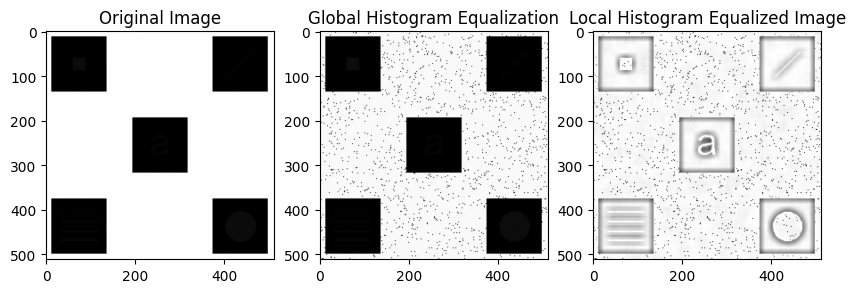

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/Fig0326(a)(embedded_square_noisy_512).tif', cv2.IMREAD_GRAYSCALE)

# Perform global histogram equalization
img_global_eq = cv2.equalizeHist(img)

# Perform local histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_local_eq = clahe.apply(img)

# Define the size of the local region
win_size = 25

# Create an empty output image
out_img = np.zeros_like(img)

# Loop over each pixel in the image
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        
        # Compute the window boundaries
        y_min = max(0, i - win_size // 2)
        y_max = min(img.shape[0], i + win_size // 2 + 1)
        x_min = max(0, j - win_size // 2)
        x_max = min(img.shape[1], j + win_size // 2 + 1)
        
        # Extract the local region
        local_region = img[y_min:y_max, x_min:x_max]
        
        # Compute the local histogram and CDF
        hist, _ = np.histogram(local_region, bins=256, range=(0, 255))
        cdf = hist.cumsum()
        cdf_normalized = cdf / cdf[-1]
        
        # Compute the new pixel value using local histogram equalization
        new_pixel = int(np.interp(img[i, j], range(256), cdf_normalized * 255))
        
        # Update the output image
        out_img[i, j] = new_pixel

# Display the original and output images
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(img_global_eq, cmap='gray')
axs[1].set_title('Global Histogram Equalization')
axs[2].imshow(out_img, cmap='gray')
axs[2].set_title('Local Histogram Equalized Image')
plt.show()


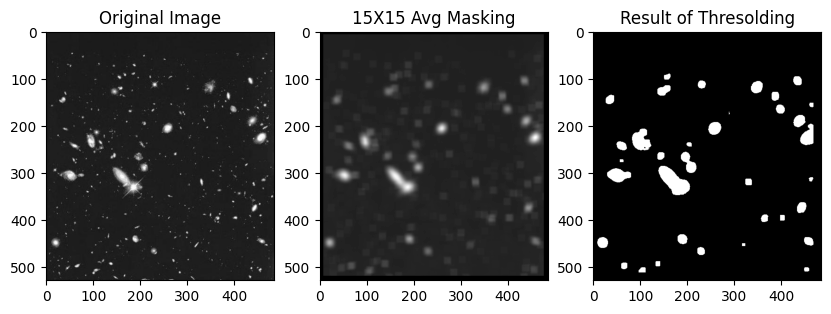

In [ ]:
# Q-4 Image Smoothing  and thresholding

import matplotlib.pyplot as plt
import math
import numpy as np
path=r"/content/Fig0334(a)(hubble-original).tif"

image1=plt.imread(path)
rows,cols=image1.shape
image2=np.zeros([rows,cols])
z=15
image2=np.zeros([rows,cols])
for x in range(0,rows-z-1):
  for y in range(0,cols-z-1):
    current_slise=image1[x+0:x+z,y:y+z]
    image2[x+math.floor(z/2),y+math.floor(z/2)]=np.mean(current_slise)
image3=np.zeros([rows,cols])
for x in range(0,rows-z-1):
  for y in range(0,cols-z-1):
    if image2[x,y]<np.max(image2)/4:
      image3[x,y]=0
    else:
      image3[x,y]=255

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(image1, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(image2, cmap='gray')
axs[1].set_title('15X15 Avg Masking')
axs[2].imshow(image3, cmap='gray')
axs[2].set_title('Result of Thresolding')
plt.show()

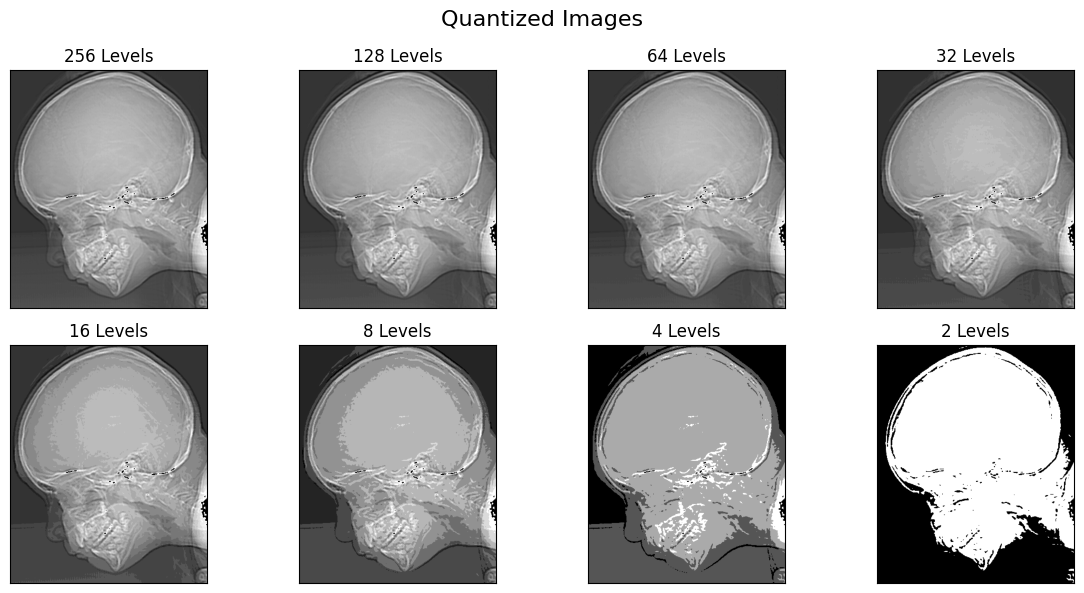

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float

# Load the image
image = img_as_float(io.imread('/content/Fig0221(a)(ctskull-256).tif'))

# Set up the plot grid
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Loop over all levels from 256 to 2
for i, levels in enumerate(reversed([2**n for n in range(9)])):
    # Compute the intensity range for each level
    int_range = np.linspace(0, 1, levels+1)

    # Quantize the image
    quantized = np.zeros_like(image)
    for j in range(levels):
        mask = np.logical_and(image >= int_range[j], image < int_range[j+1])
        if levels == 1:
          break
        quantized[mask] = j/(levels-1)

    # Display the quantized image
    row = i // 4
    col = i % 4
    axs[row, col].imshow(quantized, cmap='gray')
    axs[row, col].set_title('{0} Levels'.format(levels))
    if levels==2:
      break

# Set the plot title and axis labels
fig.suptitle('Quantized Images', fontsize=16)
plt.setp(axs, xticks=[], yticks=[])

# Show the plot
plt.tight_layout()
plt.show()


Enter intensity level: 64


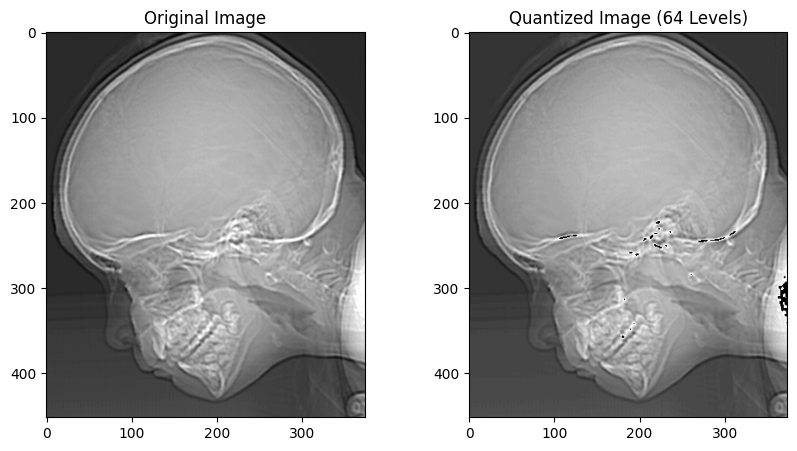

In [ ]:
def intensity_resolution(image, n_levels):
    # Compute the intensity range for each level
    int_range = np.linspace(0, 1, n_levels+1)

    # Quantize the image
    quantized = np.zeros_like(image)
    for i in range(n_levels):
        mask = np.logical_and(image >= int_range[i], image < int_range[i+1])
        quantized[mask] = i/(n_levels-1)

    # Display the original and quantized images side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(quantized, cmap='gray')
    axs[1].set_title('Quantized Image ({0} Levels)'.format(n_levels))
    plt.show()

n = int(input('Enter intensity level: '))
intensity_resolution(image,n)